In [1]:
import keras

In [2]:
dir(keras.optimizers)

['Optimizer',
 'TFOptimizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta_v2',
 'adagrad_v2',
 'adam_v2',
 'adamax_v2',
 'backend',
 'deserialize',
 'deserialize_keras_object',
 'ftrl',
 'get',
 'gradient_descent_v2',
 'keras_export',
 'nadam_v2',
 'optimizer_v2',
 'rmsprop_v2',
 'serialize',
 'serialize_keras_object',
 'tf']

In [3]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [4]:
##--- 1) Téléchargement des données
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


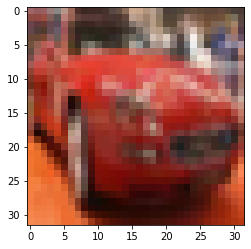

In [5]:
plt.imshow(trainX[5, :, :, :])

In [6]:
trainX.shape

(50000, 32, 32, 3)

In [7]:
##--- 2) Préparation des données
##mise en forme (vecteur : MLP agit sur des vecteurs et non des matrices)
taille_im=trainX.shape[1]*trainX.shape[2]*trainX.shape[3]
trainX = trainX.reshape((trainX.shape[0], taille_im))
testX = testX.reshape((testX.shape[0], taille_im))

In [8]:
## normalisation (moyenne=0, écart type=1 ==> Gaussienne centrée)
trainX = (trainX - np.mean(trainX)) / np.std(trainX)
testX = (testX - np.mean(testX)) / np.std(testX)

In [9]:
## préparation de la cible (vecteur --> matrice binaire : one-hot coding)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [10]:
print(trainY)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [11]:
##--- 3) Architecture du modèle
model=Sequential()
model.add(Dense(512, input_shape=(3072,), activation = "relu"))
model.add(Dense(120, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               61560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 1,636,146
Trainable params: 1,636,146
Non-trainable params: 0
_________________________________________________________________


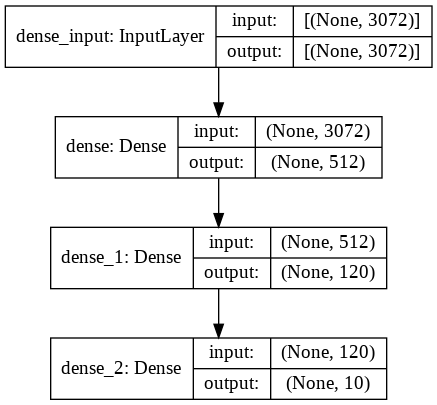

In [12]:
from keras.utils.vis_utils import plot_model

model.summary() # résumé
plot_model(model, show_shapes=True, rankdir='TB', to_file='model_cifar10.png')

In [13]:
##--- 4) Compilation
# loss='categorical_crossentropy' (classification multiclasses)
# optimisation par descente de gradient
# métrique d'évaluation est la accuracy = (TP+TN)/(TP+FP+TN+FN)
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy',optimizer="sgd",metrics=['accuracy'])

In [14]:
##--- 5) Apprentissage
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6610 - accuracy: 0.4152 - val_loss: 1.5304 - val_accuracy: 0.4567
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4211 - accuracy: 0.5011 - val_loss: 1.4512 - val_accuracy: 0.4915
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3063 - accuracy: 0.5443 - val_loss: 1.4225 - val_accuracy: 0.5068
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2160 - accuracy: 0.5782 - val_loss: 1.3926 - val_accuracy: 0.5137
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1350 - accuracy: 0.6070 - val_loss: 1.4060 - val_accuracy: 0.5173


In [15]:
print(H.history)

{'loss': [1.6610134840011597, 1.4211130142211914, 1.3062914609909058, 1.2159770727157593, 1.1349732875823975], 'accuracy': [0.4151799976825714, 0.5010799765586853, 0.5442799925804138, 0.5781999826431274, 0.60698002576828], 'val_loss': [1.5304479598999023, 1.4511756896972656, 1.4224812984466553, 1.3926268815994263, 1.405960202217102], 'val_accuracy': [0.45669999718666077, 0.49149999022483826, 0.5067999958992004, 0.513700008392334, 0.517300009727478]}


In [16]:
##--- 6) Validation
score=model.evaluate(testX, testY, verbose=0)
print('Test Accuracy : ', score[1])

Test Accuracy :  0.517300009727478


In [17]:
##--- 7) prédiction
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.53      0.67      0.59      1000
  automobile       0.60      0.64      0.61      1000
        bird       0.43      0.38      0.40      1000
         cat       0.40      0.25      0.31      1000
        deer       0.45      0.39      0.42      1000
         dog       0.47      0.41      0.44      1000
        frog       0.45      0.69      0.55      1000
       horse       0.56      0.58      0.57      1000
        ship       0.66      0.63      0.65      1000
       truck       0.58      0.53      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



In [18]:
##--- 8) sauvegarde du modèle
#sauvegarde
model.save('model.h5')
jsonModel = model.to_json()
model.save_weights('modelWeight.h5')

In [19]:
#téléchargement
modelWt=model.load_weights('modelWeight.h5')